# Libraries

In [2]:
import sys
sys.path.append("../")

In [3]:
# for working with data
import pandas as pd
import numpy as np

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")

# Phase 1

### Different Ways to Dealing with Numerical Features
__Treating as Categorical Features__

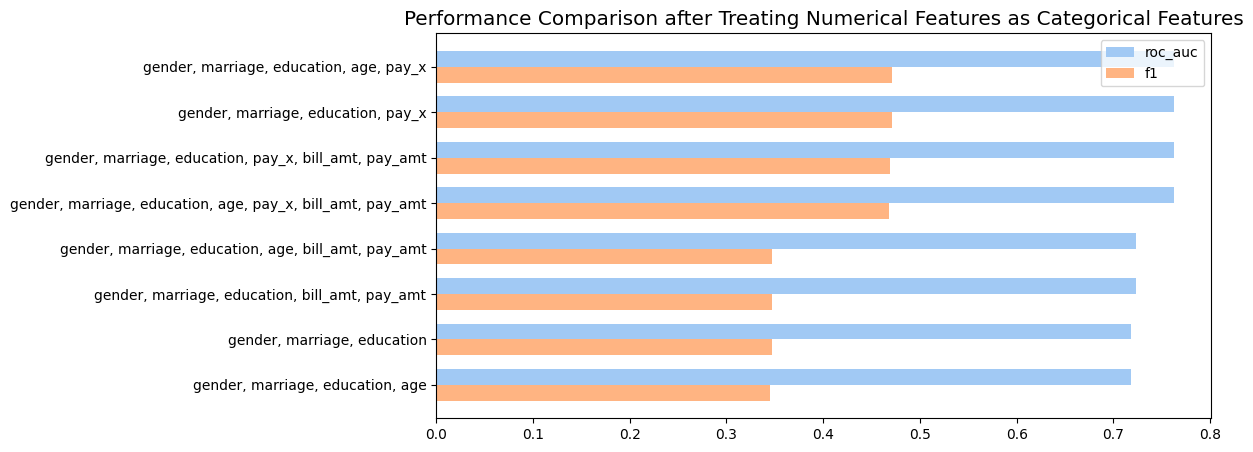

In [4]:
# validation
handle_num = pd.read_csv("../output/csv/phase_1/handling_numeric/convert_to_categorical_valid.csv")

sns.set_palette("pastel")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

handle_num_valid = handle_num.sort_values(by=["f1", "roc_auc", "accuracy"], ascending=True)

y = np.arange(handle_num_valid.shape[0])
ax.barh(y=handle_num_valid.iloc[:, 0], width=handle_num_valid.iloc[:, 1], height=0.35, label="roc_auc", alpha=1, align="edge")
ax.barh(y=y-0.35, width=handle_num_valid.iloc[:, 3], height=0.35, label="f1", alpha=1, align="edge")
ax.set_title("Performance Comparison after Treating Numerical Features as Categorical Features",fontsize="x-large")
ax.legend(loc=0)

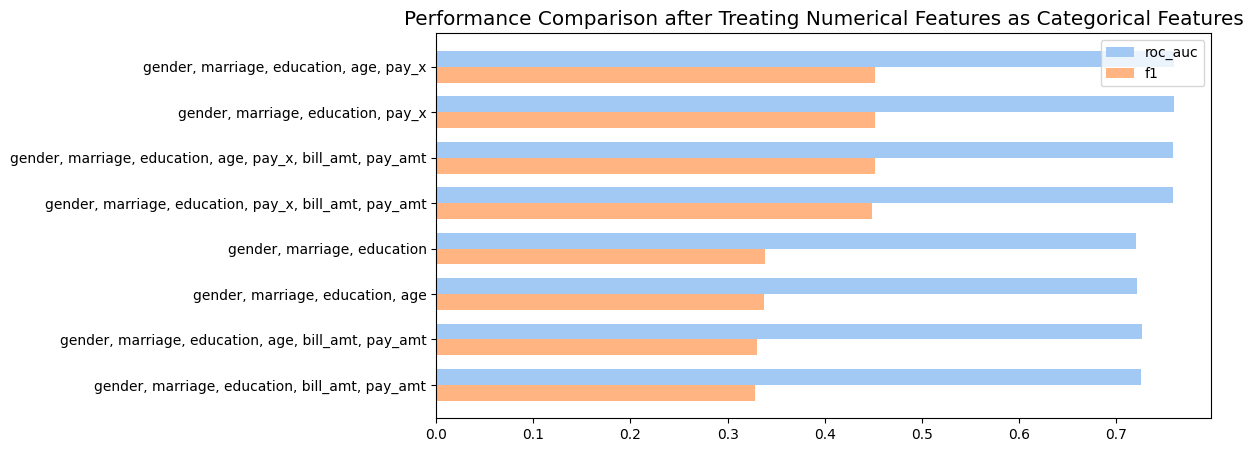

In [5]:
# testing
handle_num = pd.read_csv("../output/csv/phase_1/handling_numeric/convert_to_categorical_test.csv")

sns.set_palette("pastel")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

handle_num_test= handle_num.sort_values(by=["f1", "roc_auc", "accuracy"], ascending=True)

y = np.arange(handle_num_test.shape[0])
ax.barh(y=handle_num_test.iloc[:, 0], width=handle_num_test.iloc[:, 1], height=0.35, label="roc_auc", alpha=1, align="edge")
ax.barh(y=y-0.35, width=handle_num_test.iloc[:, 3], height=0.35, label="f1", alpha=1, align="edge")
ax.set_title("Performance Comparison after Treating Numerical Features as Categorical Features",fontsize="x-large")
ax.legend(loc=0)

__Scaling Methods__

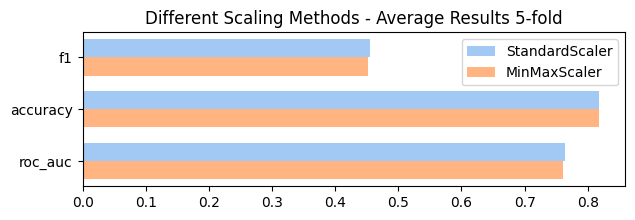

In [6]:
scaler = pd.read_csv("../output/csv/phase_1/handling_numeric/scaler.csv")

sns.set_palette("pastel")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 2))

scaler_valid = scaler[scaler['dataset']!="validation"].iloc[:, :4].sort_values(by=["f1", "roc_auc"], ascending=False)

y = np.arange(scaler_valid.shape[1]-1)
ax.barh(y=scaler_valid.columns[1:], width=scaler_valid.iloc[0, 1:], height=0.35, align="edge", label=scaler_valid.iloc[0, 0])
ax.barh(y=y-0.35, width=scaler_valid.iloc[1, 1:], height=0.35, alpha=1, align="edge", label=scaler_valid.iloc[1, 0])
ax.set_title("Different Scaling Methods - Average Results 5-fold")
ax.legend(loc=0)

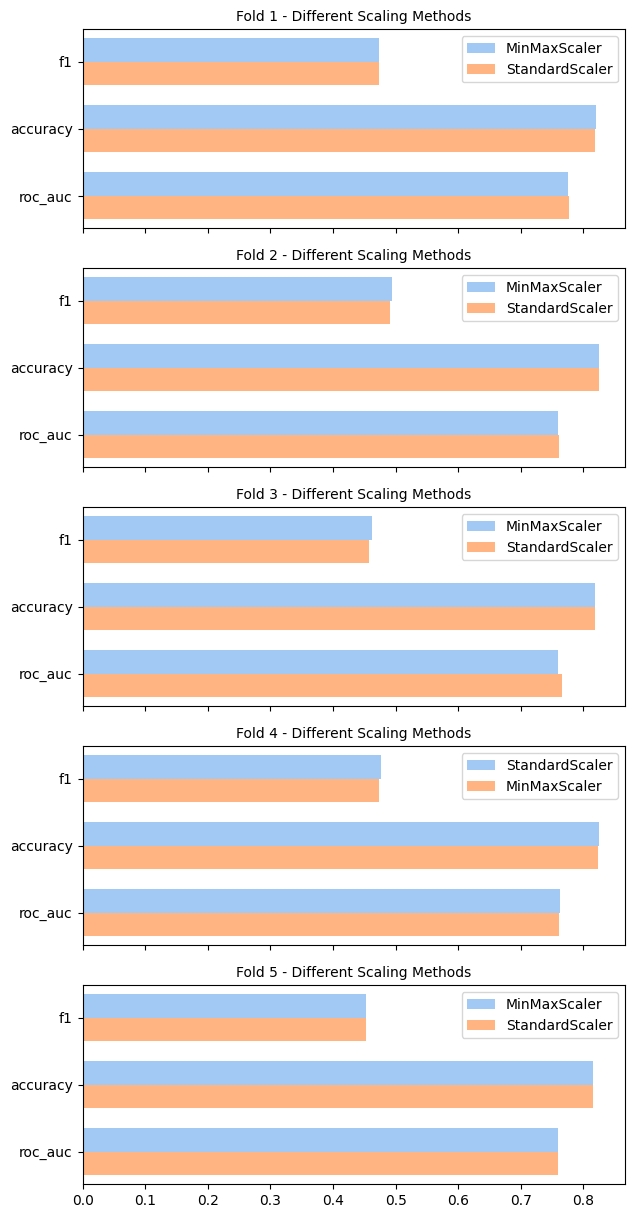

In [7]:
scaler_5folds = pd.read_csv("../output/csv/phase_1/handling_numeric/scaler_5fold.csv")

sns.set_palette("pastel")
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(7, 15), sharex=True)

# scaler_valid = scaler[scaler['dataset']!="validation"].iloc[:, :4].sort_values(by=["f1", "roc_auc"], ascending=False)

for i in range(len(ax)):
    scaler_fold = scaler_5folds[scaler_5folds['fold']==i+1].iloc[:, :4].sort_values(by=["f1", "roc_auc"], ascending=False)

    y = np.arange(scaler_fold.shape[1]-1)
    ax[i].barh(y=scaler_fold.columns[1:], width=scaler_fold.iloc[0, 1:], height=0.35, align="edge", label=scaler_fold.iloc[0, 0])
    ax[i].barh(y=y-0.35, width=scaler_fold.iloc[1, 1:], height=0.35, alpha=1, align="edge", label=scaler_fold.iloc[1, 0])
    ax[i].set_title(f"Fold {i+1} - Different Scaling Methods", fontsize="medium")
    ax[i].legend(loc=0)

Cả 2 phương pháp MinMaxScale và StandardScaler đều cho kết quả cao gần như ngang nhau, chênh lệch giữa hai phương pháp không quá nhiều. Tuy nhiên khi thực hiện 5-fold validation, StandardScaler cho thấy kết quả nhỉnh hơn MinMaxScaler trên nhiều fold hơn nên ta sẽ chọn standardscaler làm phương pháp scale để test cho phase 2.

__Encoding__

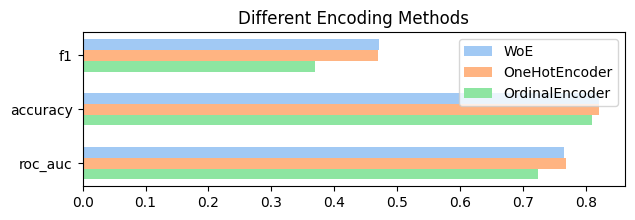

In [8]:
encoder = pd.read_csv("../output/csv/phase_1/handling_numeric/encoder.csv")

sns.set_palette("pastel")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 2))

encoder_valid = encoder[encoder['dataset']=="validation"].iloc[:, :4].sort_values(by=["f1", "roc_auc"], ascending=False)

y = np.arange(encoder_valid.shape[1]-1)
ax.barh(y=y+0.2, width=encoder_valid.iloc[0, 1:], height=0.2, align="center", label=encoder_valid.iloc[0, 0])
ax.barh(y=encoder_valid.columns[1:], width=encoder_valid.iloc[1, 1:], height=0.2, alpha=1, align="center", label=encoder_valid.iloc[1, 0])
ax.barh(y=y-0.2, width=encoder_valid.iloc[2, 1:], height=0.2, alpha=1, align="center", label=encoder_valid.iloc[2, 0])
ax.set_title("Different Encoding Methods")
ax.legend(loc=0)

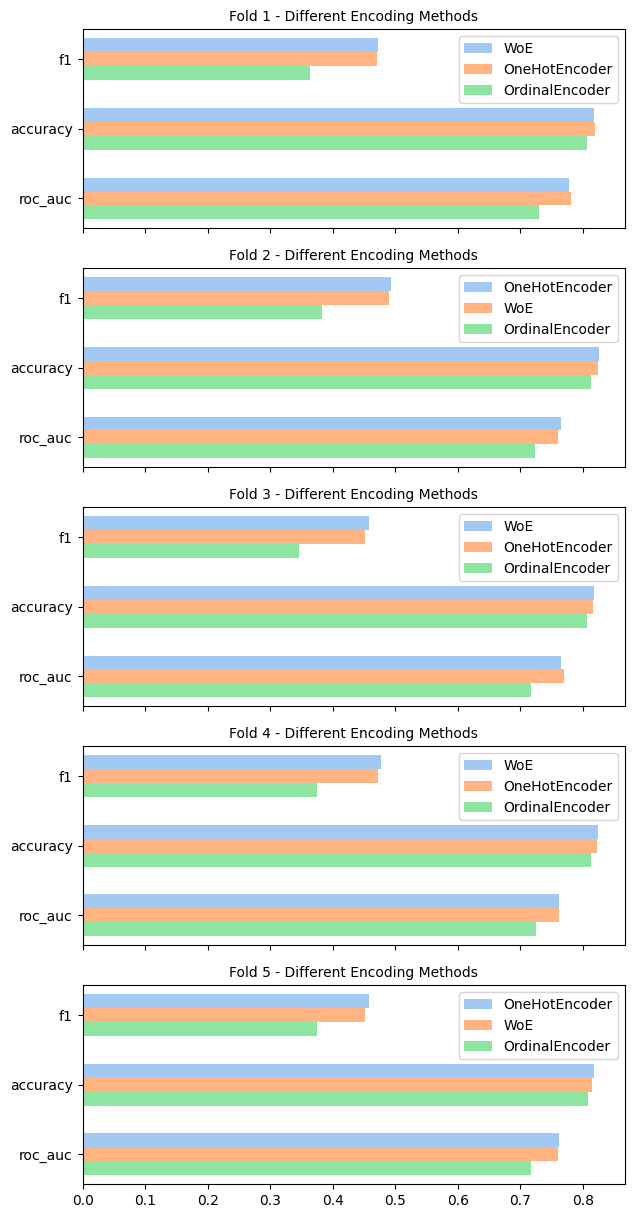

In [9]:
encoder_5fold = pd.read_csv("../output/csv/phase_1/handling_numeric/encoder_5fold.csv")

sns.set_palette("pastel")
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(7, 15), sharex=True)

# scaler_valid = scaler[scaler['dataset']!="validation"].iloc[:, :4].sort_values(by=["f1", "roc_auc"], ascending=False)

for i in range(len(ax)):
    encoder_fold = encoder_5fold[encoder_5fold['fold']==i+1].iloc[:, :4].sort_values(by=["f1", "roc_auc"], ascending=False)

    y = np.arange(scaler_valid.shape[1]-1)
    ax[i].barh(y=y+0.2, width=encoder_fold.iloc[0, 1:], height=0.2, align="center", label=encoder_fold.iloc[0, 0])
    ax[i].barh(y=encoder_fold.columns[1:], width=encoder_fold.iloc[1, 1:], height=0.2, alpha=1, align="center", label=encoder_fold.iloc[1, 0])
    ax[i].barh(y=y-0.2, width=encoder_fold.iloc[2, 1:], height=0.2, alpha=1, align="center", label=encoder_fold.iloc[2, 0])
    ax[i].set_title(f"Fold {i+1} - Different Encoding Methods", fontsize="medium")
    ax[i].legend(loc=0)

WoE và OneHot cho kết quả tốt hơn hẳn Ordinal. WoE và OneHot có performance tốt gần như nhau, cụ thể, trong cả 5 folds validation và trên tập test, WoE sẽ cho kết quả f1 score cao hơn nhưng OneHot sẽ cho roc_auc cao hơn.

__SMOTE__

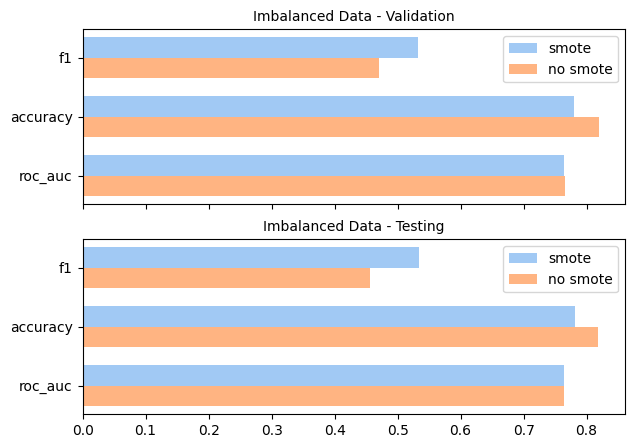

In [10]:
smote = pd.read_csv("../output/csv/phase_1/imbalanced_data/smote.csv")

sns.set_palette("pastel")
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 5), sharex=True)

for i in range(len(ax)):
    smote_status = smote[smote['dataset']==smote['dataset'].unique()[i]].iloc[:, :4].sort_values(by=["f1", "roc_auc", ], ascending=False)

    y = np.arange(smote_status.shape[1]-1)
    ax[i].barh(y=smote_status.columns[1:], width=smote_status.iloc[0, 1:], height=0.35, alpha=1, align="edge", label="smote" if smote_status.iloc[0, 0]==1 else "no smote")
    ax[i].barh(y=y-0.35, width=smote_status.iloc[1, 1:], height=0.35, alpha=1, align="edge", label="smote" if smote_status.iloc[1, 0]==1 else "no smote")
    ax[i].set_title(f"Imbalanced Data - {smote['dataset'].unique()[i].capitalize()}", fontsize="medium")
    ax[i].legend(loc=0)

__Information Value__

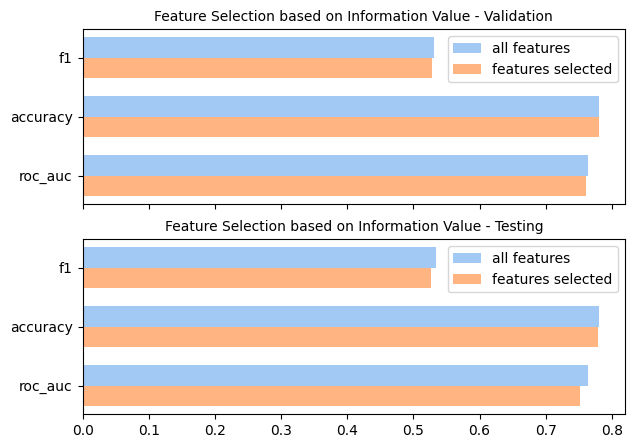

In [11]:
iv = pd.read_csv("../output/csv/phase_1/feature_selection/feature_selection.csv")
sns.set_palette("pastel")
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 5), sharex=True)

for i in range(len(ax)):
    iv_status = iv[iv['dataset']==iv['dataset'].unique()[i]].iloc[:, [0, 2, 3, 4]].sort_values(by=["f1", "roc_auc", ], ascending=False)

    y = np.arange(iv_status.shape[1]-1)
    ax[i].barh(y=iv_status.columns[1:], width=iv_status.iloc[0, 1:], height=0.35, alpha=1, align="edge", label="features selected" if iv_status.iloc[0, 0]=="yes" else "all features")
    ax[i].barh(y=y-0.35, width=iv_status.iloc[1, 1:], height=0.35, alpha=1, align="edge", label="features selected" if iv_status.iloc[1, 0]=="yes" else "all features")
    ax[i].set_title(f"Feature Selection based on Information Value - {iv['dataset'].unique()[i].capitalize()}", fontsize="medium")
    ax[i].legend(loc=0)

# Phase 2
### Models Comparison
__Validation__

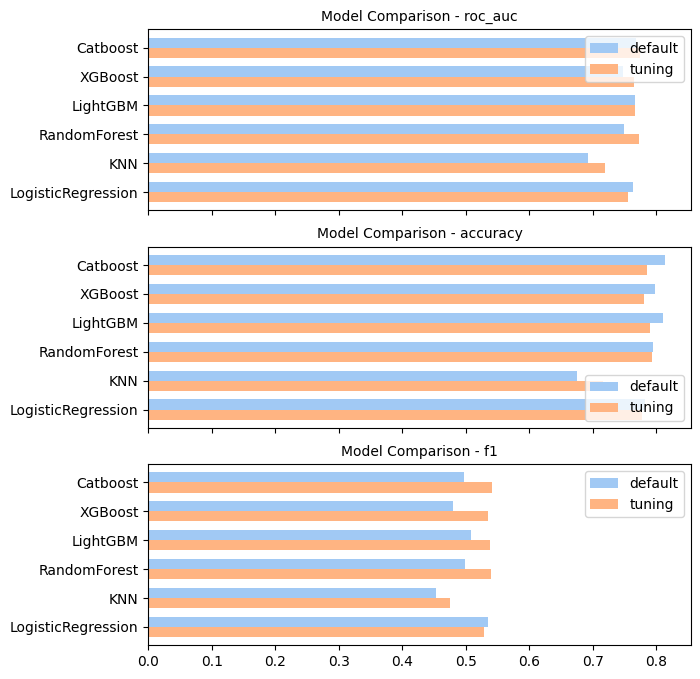

In [19]:
valid = pd.read_csv("../output/csv/phase_2/valid_all.csv")

sns.set_palette("pastel")
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(7, 8), sharex=True)

for i in range(len(ax)):
    metric = valid.columns[i+1]
    valid_scores = valid[['model', 'model_status', metric]]

    y = np.arange(6)
    ax[i].barh(y=valid_scores.iloc[:6, 0], width=valid_scores.iloc[:6, -1], height=0.35, alpha=1, align="edge", label="default")
    ax[i].barh(y=y-0.35, width=valid_scores.iloc[6:, -1], height=0.35, alpha=1, align="edge", label="tuning")
    ax[i].set_title(f"Model Comparison - {metric}", fontsize="medium")
    ax[i].legend(loc=0)

__Testing__

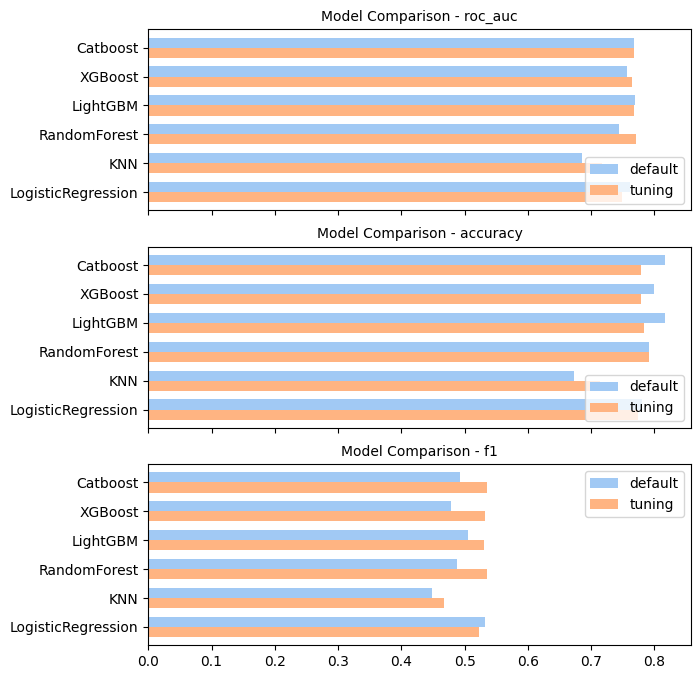

In [20]:
valid = pd.read_csv("../output/csv/phase_2/testing_all.csv")

sns.set_palette("pastel")
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(7, 8), sharex=True)

for i in range(len(ax)):
    metric = valid.columns[i+1]
    valid_scores = valid[['model', 'model_status', metric]]

    y = np.arange(6)
    ax[i].barh(y=valid_scores.iloc[:6, 0], width=valid_scores.iloc[:6, -1], height=0.35, alpha=1, align="edge", label="default")
    ax[i].barh(y=y-0.35, width=valid_scores.iloc[6:, -1], height=0.35, alpha=1, align="edge", label="tuning")
    ax[i].set_title(f"Model Comparison - {metric}", fontsize="medium")
    ax[i].legend(loc=0)